In [ ]:

# # Smart Factory Energy Prediction Challenge
# ## 1. Data Exploration and Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Loading the dataset...")
data = pd.read_csv('D:\Freelancing\DS-Intern-Assignment\data\data.csv')
print("\nDataset Shape:", data.shape)
print("\nFirst few rows of the dataset:")
print(data.head())
print("\nData types and non-null counts:")
print(data.info())



Loading the dataset...

Dataset Shape: (16857, 29)

First few rows of the dataset:
             timestamp equipment_energy_consumption     lighting_energy  zone1_temperature     zone1_humidity zone2_temperature  zone2_humidity  zone3_temperature  zone3_humidity  zone4_temperature  zone4_humidity  zone5_temperature  zone5_humidity  zone6_temperature  zone6_humidity  zone7_temperature  zone7_humidity  zone8_temperature  zone8_humidity  zone9_temperature  zone9_humidity  outdoor_temperature  atmospheric_pressure  outdoor_humidity  wind_speed  visibility_index  dew_point  random_variable1  random_variable2
0  2016-01-11 17:00:00                         60.0  -77.78778596503064  33.74660933896648  47.59666666666671              19.2       44.790000              19.79             NaN          19.000000       45.566667          17.166667           55.20                NaN       84.256667          17.200000       41.626667               18.2       48.900000          17.033333           45.53  

In [11]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       zone2_humidity  zone3_temperature  zone3_humidity  zone4_temperature  zone4_humidity  zone5_temperature  zone5_humidity  zone6_temperature  zone6_humidity  zone7_temperature  zone7_humidity  zone8_temperature  zone8_humidity  zone9_temperature  zone9_humidity  outdoor_temperature  atmospheric_pressure  outdoor_humidity    wind_speed  visibility_index     dew_point  random_variable1  random_variable2
count    15990.000000       16055.000000    15979.000000       16041.000000    16076.000000       16019.000000    16056.000000       16009.000000    16010.000000       16063.000000    16052.000000       16009.000000    16080.000000       16084.000000    15969.000000         16051.000000          16015.000000      16058.000000  16029.000000      16042.000000  16031.000000      16031.000000      16033.000000
mean        39.494553          21.665733       38.201314          20.239922       37.945608          19.052613       50.289131           6.469934       59.1629

In [12]:
# Check for missing values
print("\nMissing values per column:")
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                          'Percentage': missing_percentage})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))




Missing values per column:
                              Missing Values  Percentage
zone9_humidity                           888    5.267841
zone3_humidity                           878    5.208519
zone1_temperature                        867    5.143264
zone2_humidity                           867    5.143264
zone2_temperature                        853    5.060212
zone8_temperature                        848    5.030551
zone6_temperature                        848    5.030551
zone6_humidity                           847    5.024619
equipment_energy_consumption             844    5.006822
atmospheric_pressure                     842    4.994958
zone5_temperature                        838    4.971229
wind_speed                               828    4.911906
random_variable1                         826    4.900042
dew_point                                826    4.900042
random_variable2                         824    4.888177
zone4_temperature                        816    4.840719
vis

In [13]:
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [14]:
# Extract time-based features
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year
data['day_of_week'] = data['timestamp'].dt.dayofweek

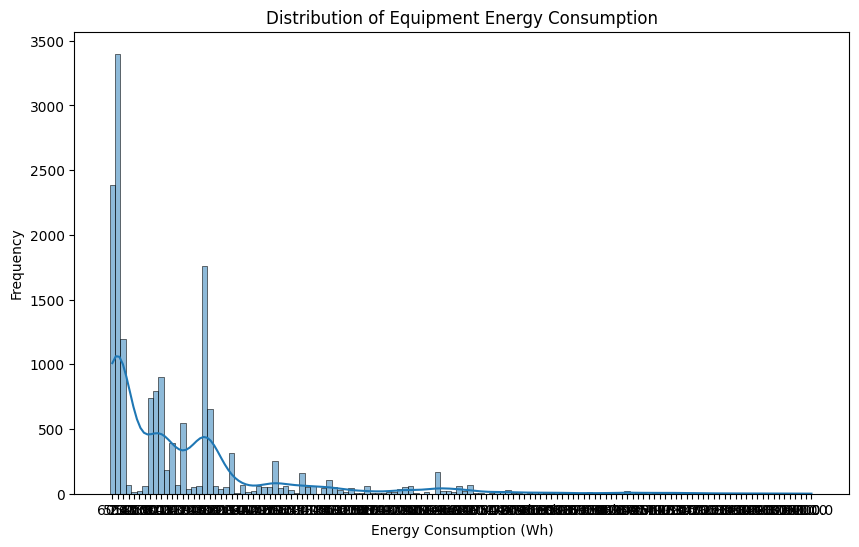

In [15]:
# Visualize the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['equipment_energy_consumption'], kde=True)
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()


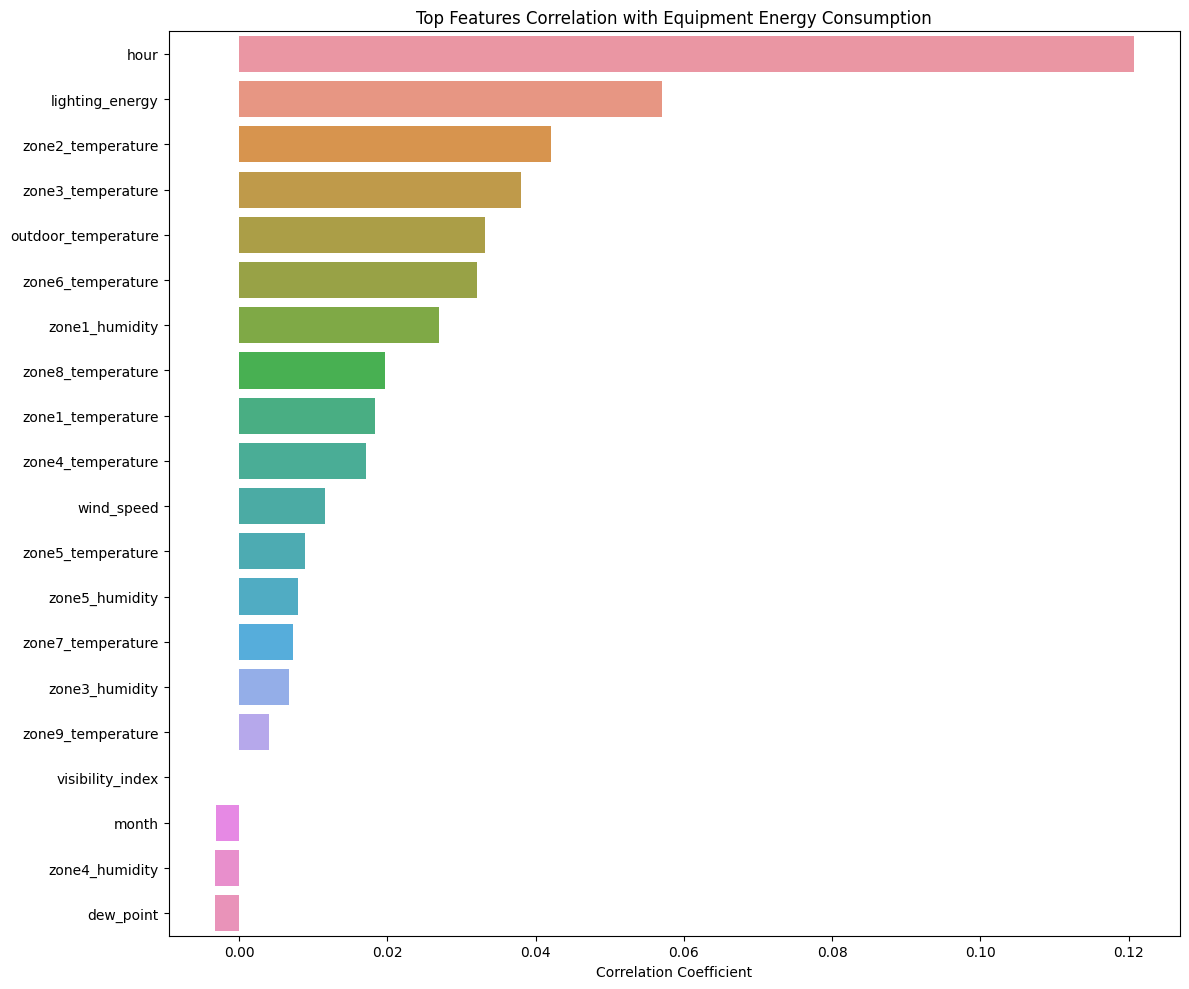

In [16]:
# Visualize correlation with target
plt.figure(figsize=(12, 10))
numeric_data = data.apply(pd.to_numeric, errors='coerce')
correlation = numeric_data.corr()['equipment_energy_consumption'].sort_values(ascending=False)
correlation = correlation.drop('equipment_energy_consumption')
top_n = 20 
top_correlations = correlation.head(top_n)
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.title('Top Features Correlation with Equipment Energy Consumption')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

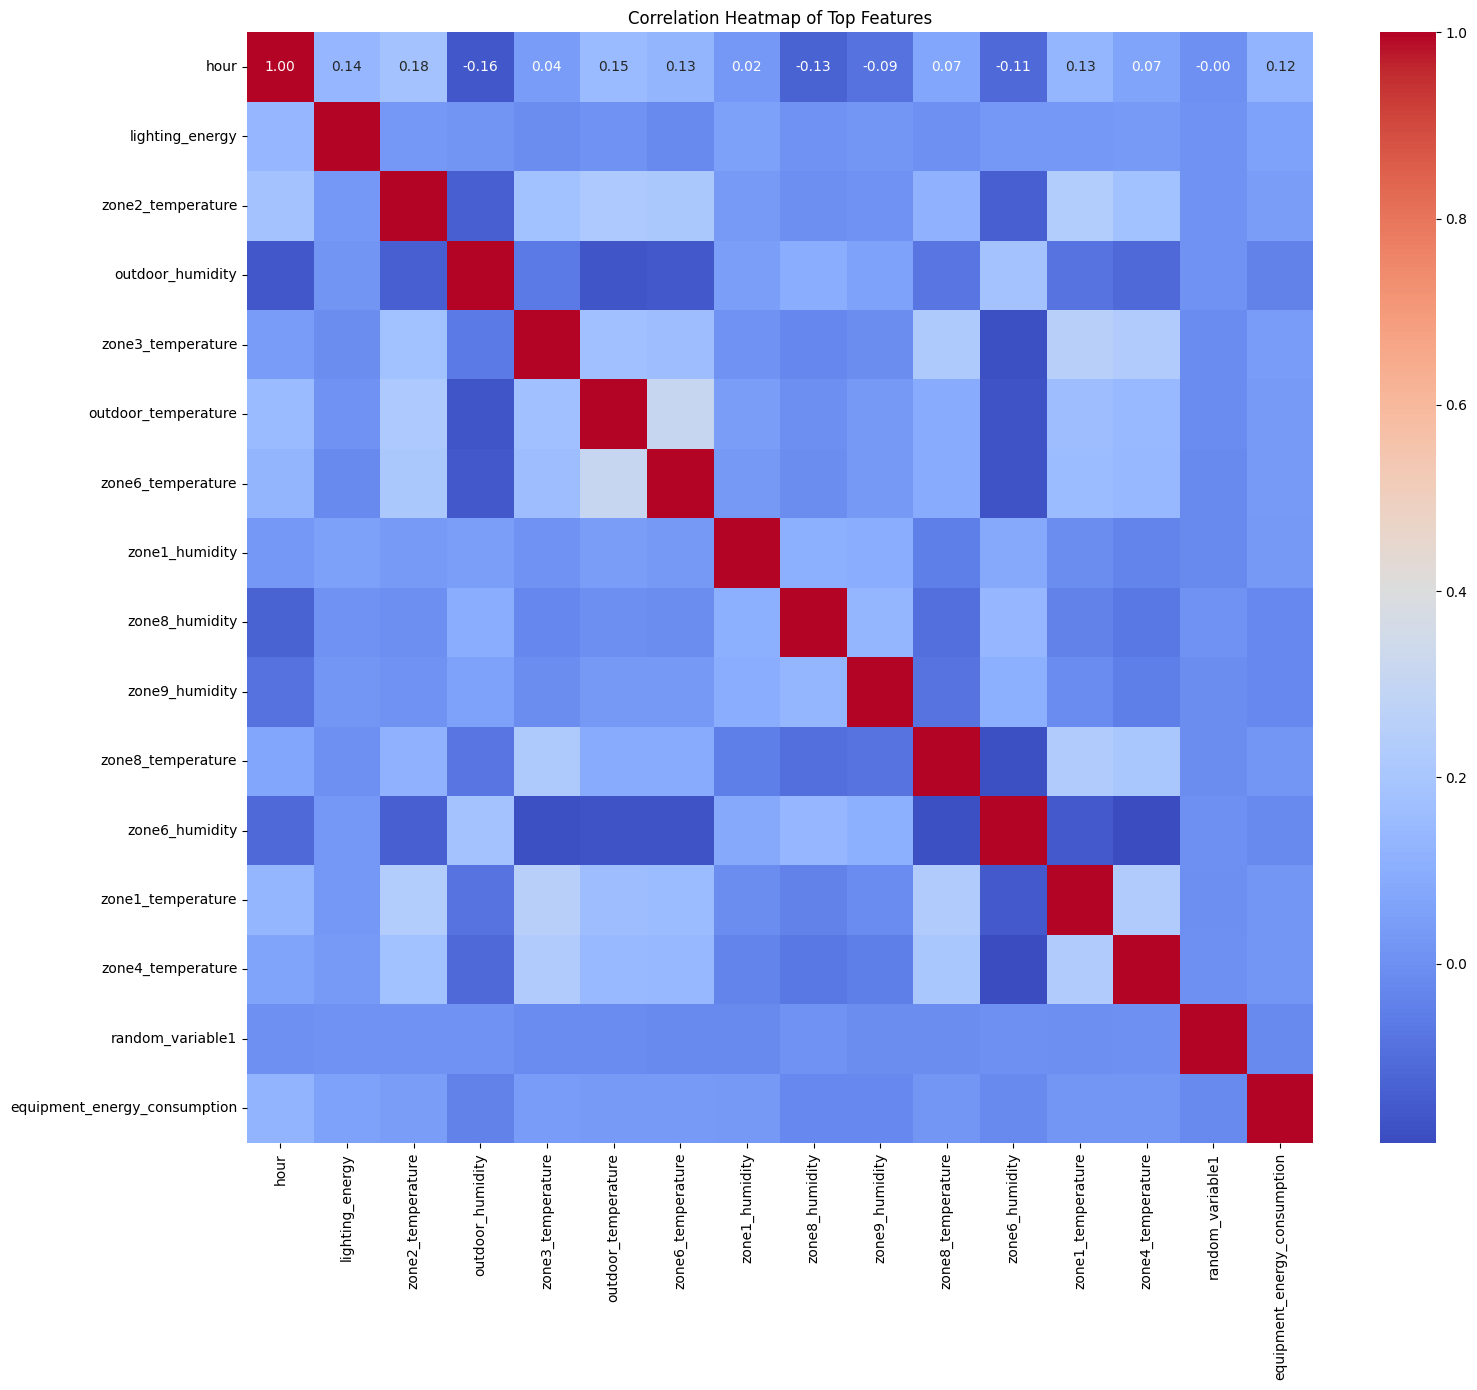

In [ ]:
# Correlation heatmap for selected features
plt.figure(figsize=(16, 14))
numeric_data = data.apply(pd.to_numeric, errors='coerce')
correlation = numeric_data.corr()['equipment_energy_consumption'].sort_values(ascending=False)
correlation = correlation.drop('equipment_energy_consumption') 
top_corr_features = correlation.abs().sort_values(ascending=False)[:15].index
correlation_matrix = numeric_data[list(top_corr_features) + ['equipment_energy_consumption']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

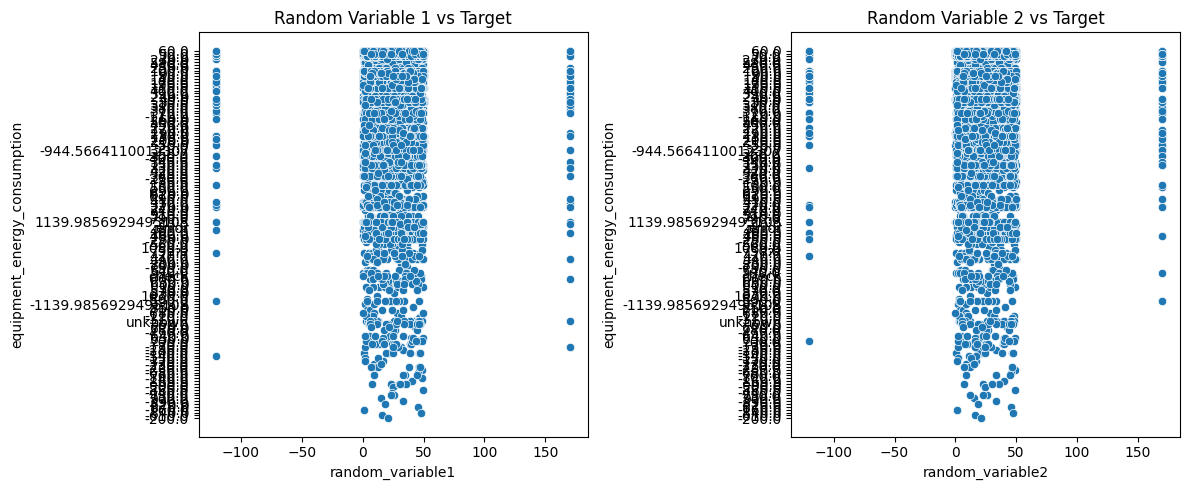

In [ ]:
# Analyze random variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='random_variable1', y='equipment_energy_consumption', data=data)
plt.title('Random Variable 1 vs Target')
plt.subplot(1, 2, 2)
sns.scatterplot(x='random_variable2', y='equipment_energy_consumption', data=data)
plt.title('Random Variable 2 vs Target')
plt.tight_layout()
plt.show()

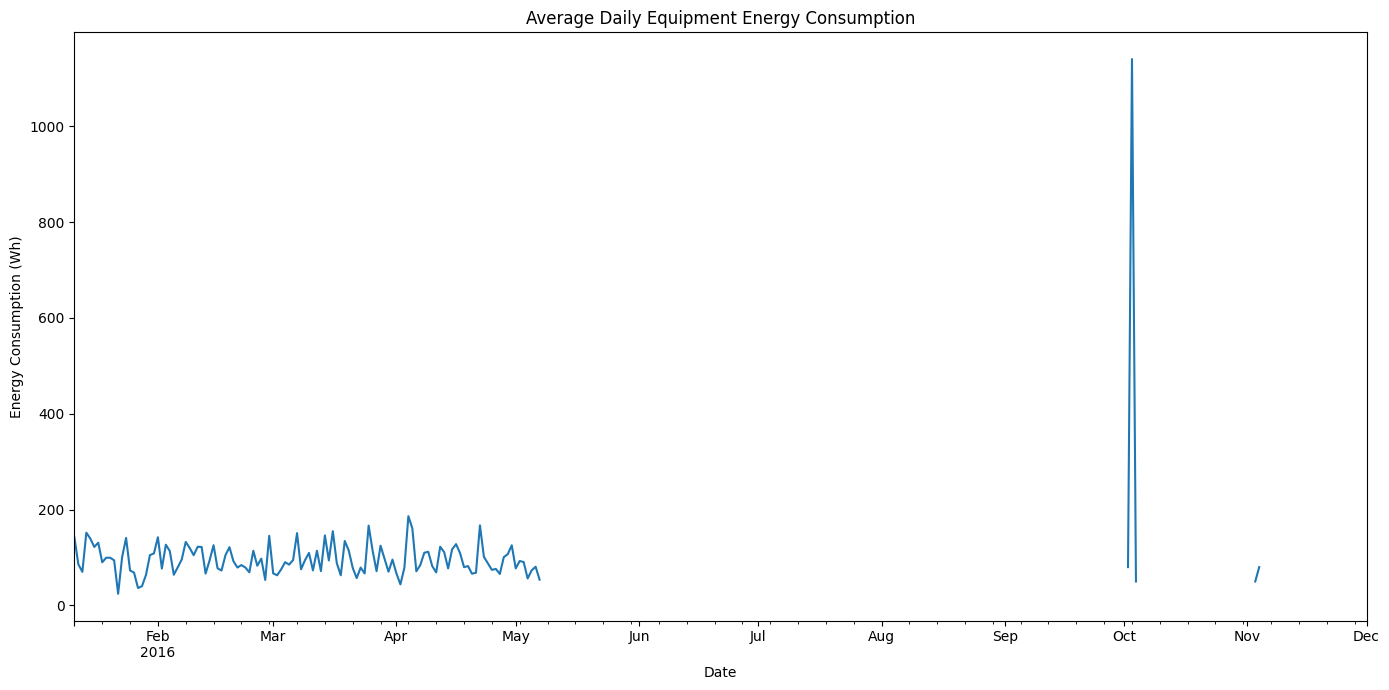

In [24]:
# Analyze energy consumption patterns over time
plt.figure(figsize=(14, 7))
data['equipment_energy_consumption'] = pd.to_numeric(data['equipment_energy_consumption'], errors='coerce')
energy_ts = data.set_index('timestamp')['equipment_energy_consumption']
daily_energy = energy_ts.resample('D').mean()
daily_energy.plot()
plt.title('Average Daily Equipment Energy Consumption')
plt.ylabel('Energy Consumption (Wh)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

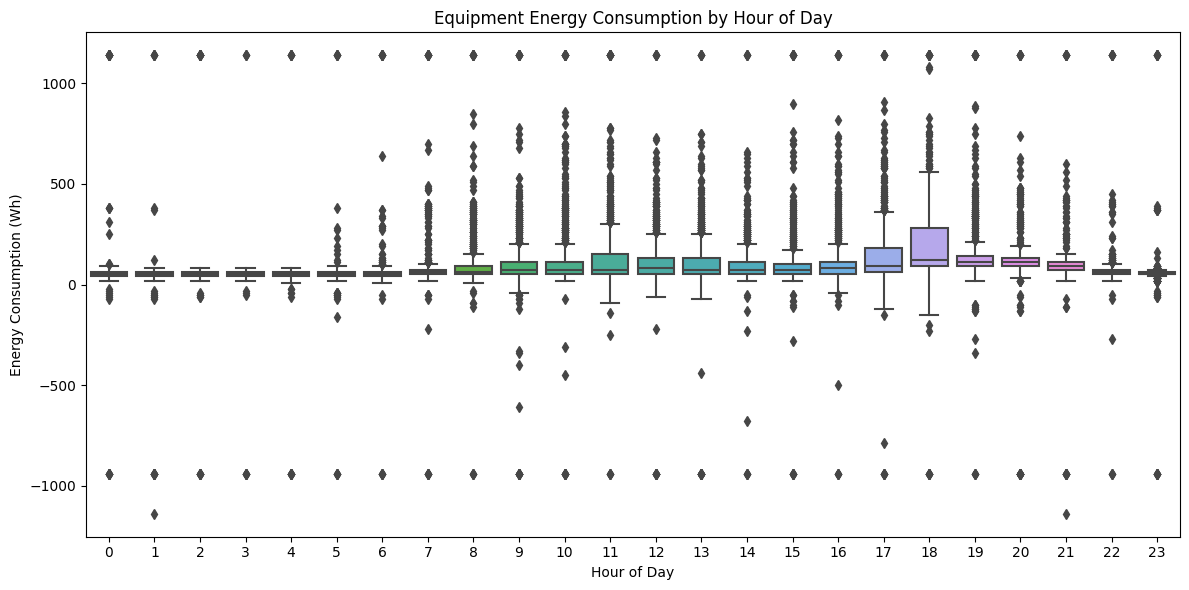

In [20]:
# Analyze energy consumption by hour of day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='equipment_energy_consumption', data=data)
plt.title('Equipment Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption (Wh)')
plt.tight_layout()
plt.show()


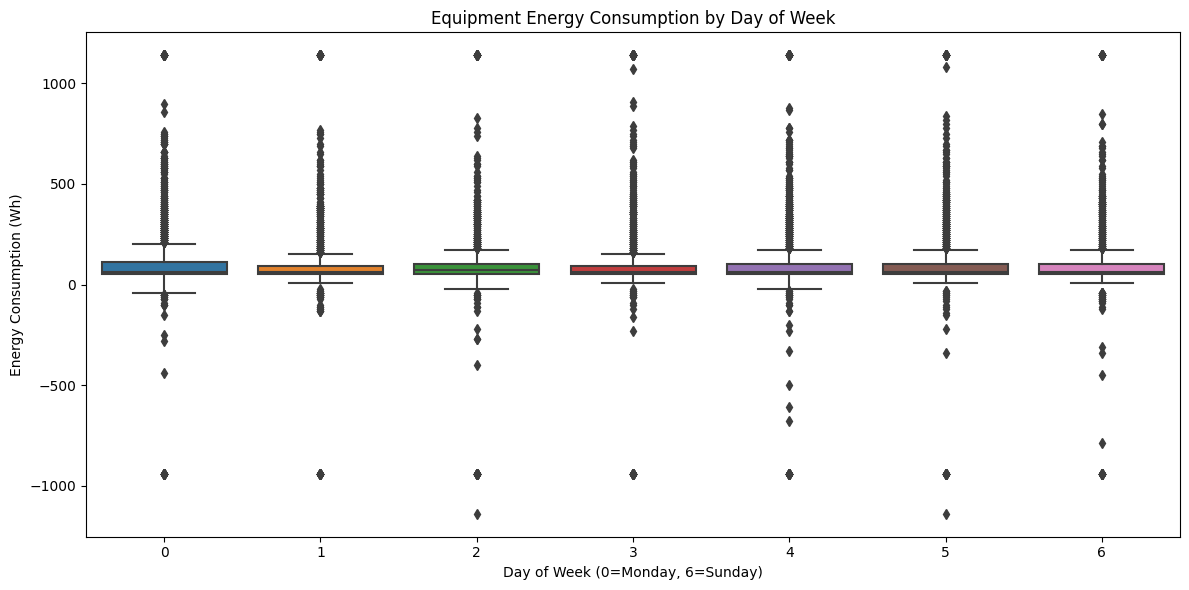

In [21]:

# Analyze energy consumption by day of week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='equipment_energy_consumption', data=data)
plt.title('Equipment Energy Consumption by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Energy Consumption (Wh)')
plt.tight_layout()
plt.show()

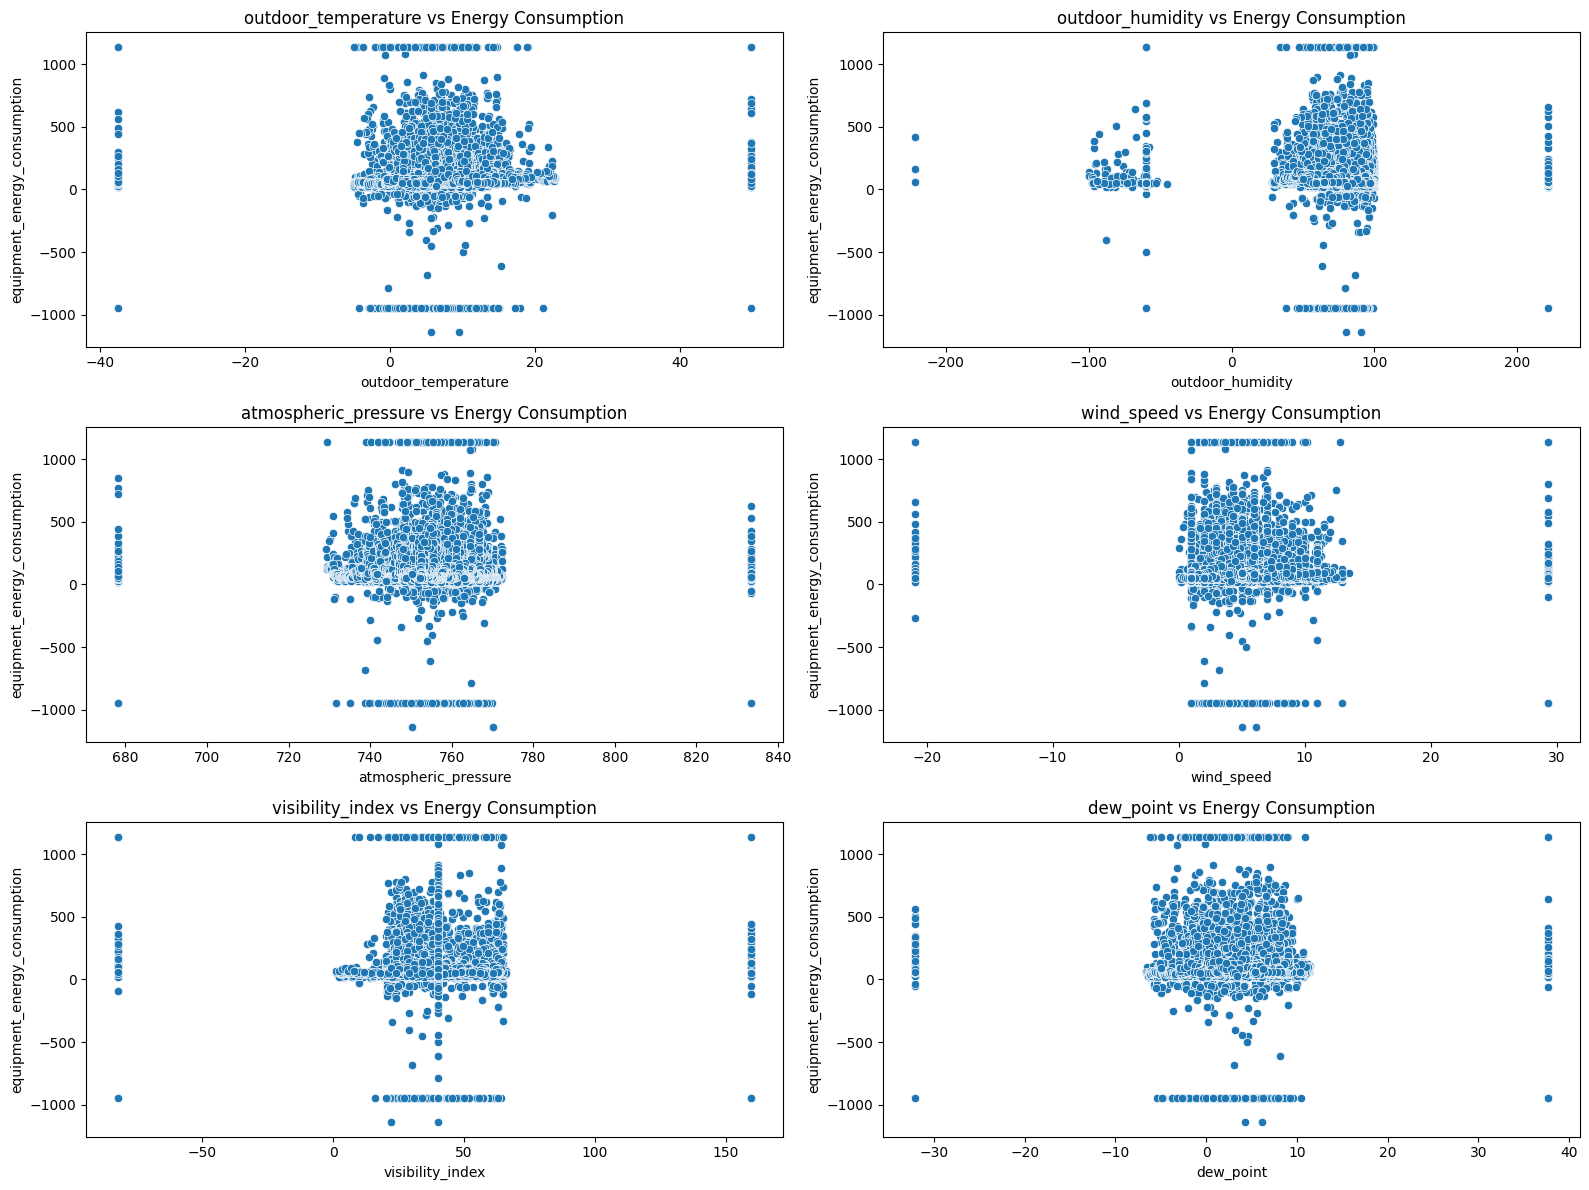

In [22]:

# Analyze relationship between outdoor conditions and energy consumption
plt.figure(figsize=(16, 12))
outdoor_vars = ['outdoor_temperature', 'outdoor_humidity', 'atmospheric_pressure', 
                'wind_speed', 'visibility_index', 'dew_point']
for i, var in enumerate(outdoor_vars):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=var, y='equipment_energy_consumption', data=data)
    plt.title(f'{var} vs Energy Consumption')
plt.tight_layout()
plt.show()


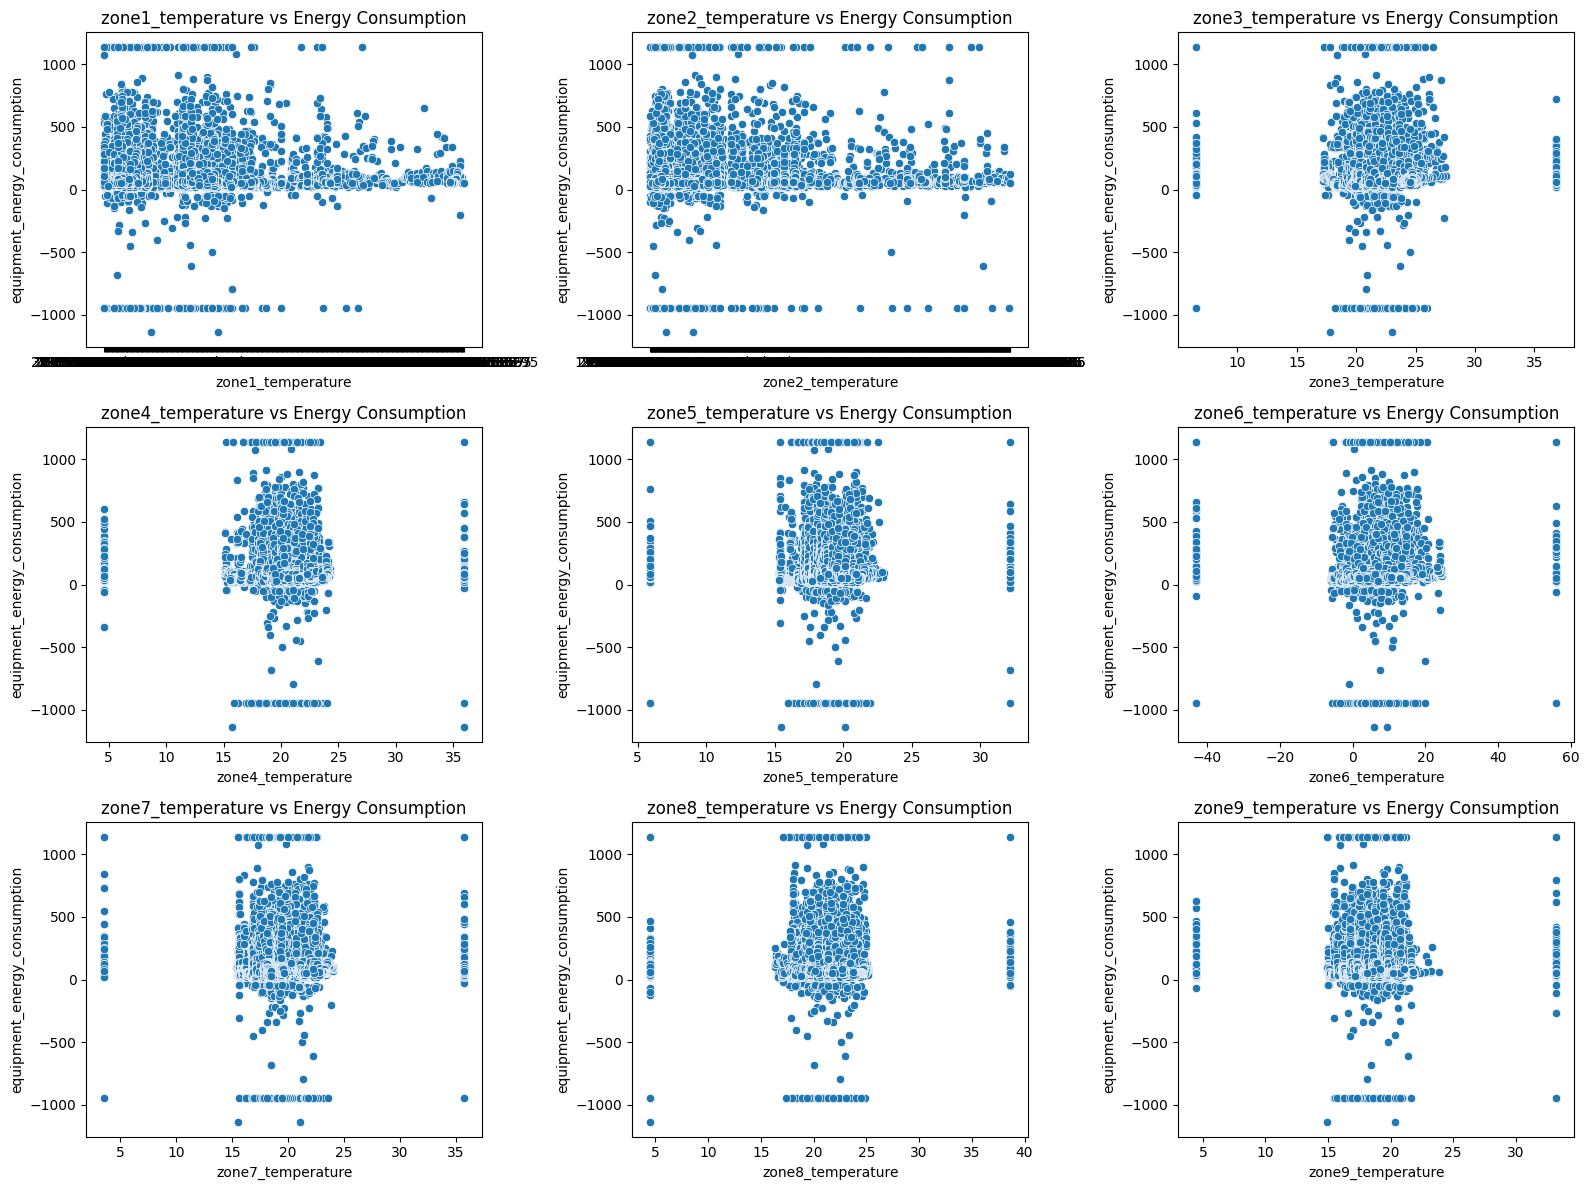

In [ ]:

# Analyze zone temperatures and their relationship with energy consumption
plt.figure(figsize=(16, 12))
zone_temps = [col for col in data.columns if 'temperature' in col and 'outdoor' not in col]
for i, temp in enumerate(zone_temps):
    if i < 9: 
        plt.subplot(3, 3, i+1)
        sns.scatterplot(x=temp, y='equipment_energy_consumption', data=data)
        plt.title(f'{temp} vs Energy Consumption')
plt.tight_layout()
plt.show()
